<a href="https://colab.research.google.com/github/KrittikaDas/Heart-Disease-Prediction-using-Machine-Learning/blob/master/Health_Insurance_SQL_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sqlite3


In [2]:
from google.colab import files
uploaded = files.upload()


Saving train.csv.zip to train.csv.zip


In [3]:
df = pd.read_csv('train.csv.zip')
df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
#in-memory SQLite DB
conn = sqlite3.connect(":memory:")

#3 separate logical tables
df[['id', 'Gender', 'Age', 'Driving_License', 'Region_Code']].to_sql('customers', conn, index=False)
df[['id', 'Vehicle_Age', 'Vehicle_Damage']].to_sql('vehicles', conn, index=False)
df[['id', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']].to_sql('policies', conn, index=False)


381109

In [5]:
query = """
SELECT COUNT(*) AS total_interested
FROM policies
WHERE Response = 1
"""
pd.read_sql(query, conn)


,total_interested
0,46710


In [6]:
query = """
SELECT Gender, COUNT(*) AS total_customers,
       SUM(Response) AS interested_customers,
       ROUND(SUM(Response) * 100.0 / COUNT(*), 2) AS conversion_percent
FROM customers
JOIN policies USING (id)
GROUP BY Gender
"""
pd.read_sql(query, conn)


,Gender,total_customers,interested_customers,conversion_percent
0,Female,175020,18185,10.39
1,Male,206089,28525,13.84


In [7]:
query = """
SELECT Vehicle_Age, AVG(Annual_Premium) AS average_premium
FROM vehicles
JOIN policies USING (id)
GROUP BY Vehicle_Age
"""
pd.read_sql(query, conn)


,Vehicle_Age,average_premium
0,1-2 Year,30523.582120
1,< 1 Year,30119.552025
2,> 2 Years,35654.499469


In [8]:
query = """
SELECT Region_Code, COUNT(*) AS interested_customers
FROM customers
JOIN policies USING (id)
WHERE Response = 1
GROUP BY Region_Code
ORDER BY interested_customers DESC
"""
pd.read_sql(query, conn)


,Region_Code,interested_customers
0,28.0,19917
1,8.0,3257
2,41.0,2224
3,46.0,2032
4,29.0,1365
5,3.0,1181
6,11.0,1041
7,15.0,958
8,30.0,900
9,35.0,865


In [10]:
query = """
SELECT Vehicle_Age,
       COUNT(*) AS total_customers,
       SUM(Response) AS interested,
       ROUND(SUM(Response) * 100.0 / COUNT(*), 2) AS conversion_rate
FROM vehicles
JOIN policies USING (id)
GROUP BY Vehicle_Age
ORDER BY conversion_rate DESC
"""
pd.read_sql(query, conn)


,Vehicle_Age,total_customers,interested,conversion_rate
0,> 2 Years,16007,4702,29.37
1,1-2 Year,200316,34806,17.38
2,< 1 Year,164786,7202,4.37


In [11]:
query = """
SELECT Driving_License,
       COUNT(*) AS total_customers,
       SUM(Response) AS interested,
       ROUND(SUM(Response) * 100.0 / COUNT(*), 2) AS conversion_rate
FROM customers
JOIN policies USING (id)
GROUP BY Driving_License
"""
pd.read_sql(query, conn)


,Driving_License,total_customers,interested,conversion_rate
0,0,812,41,5.05
1,1,380297,46669,12.27


In [12]:
query = """
SELECT
  CASE
    WHEN Age BETWEEN 20 AND 29 THEN '20s'
    WHEN Age BETWEEN 30 AND 39 THEN '30s'
    WHEN Age BETWEEN 40 AND 49 THEN '40s'
    WHEN Age BETWEEN 50 AND 59 THEN '50s'
    ELSE '60+'
  END AS age_group,
  AVG(Annual_Premium) AS avg_premium
FROM customers
JOIN policies USING (id)
GROUP BY age_group
ORDER BY age_group
"""
pd.read_sql(query, conn)


,age_group,avg_premium
0,20s,30174.882876
1,30s,27666.887490
2,40s,30824.520522
3,50s,31841.764604
4,60+,33478.535266


In [13]:
query = """
SELECT Policy_Sales_Channel,
       COUNT(*) AS total,
       SUM(Response) AS interested
FROM policies
GROUP BY Policy_Sales_Channel
ORDER BY interested DESC
LIMIT 10
"""
pd.read_sql(query, conn)


,Policy_Sales_Channel,total,interested
0,26.0,79700,15891
1,124.0,73995,13996
2,152.0,134784,3858
3,156.0,10661,2297
4,157.0,6684,1794
5,122.0,9930,1720
6,154.0,5993,1474
7,163.0,2893,880
8,160.0,21779,475
9,155.0,1234,395


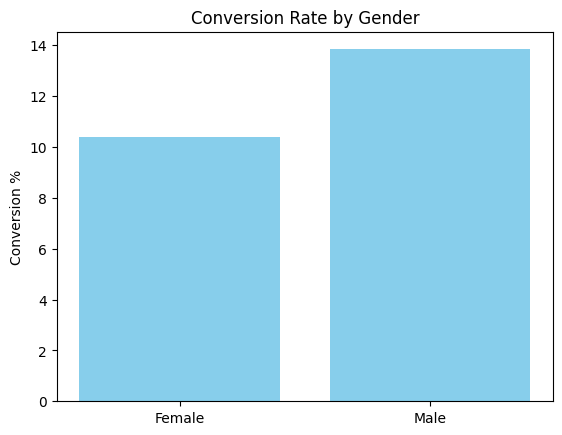

In [9]:
import matplotlib.pyplot as plt

#Gender-based conversion visualization
query = """
SELECT Gender, ROUND(SUM(Response) * 100.0 / COUNT(*), 2) AS conversion_percent
FROM customers
JOIN policies USING (id)
GROUP BY Gender
"""
data = pd.read_sql(query, conn)

#Plot
plt.bar(data['Gender'], data['conversion_percent'], color='skyblue')
plt.title("Conversion Rate by Gender")
plt.ylabel("Conversion %")
plt.show()


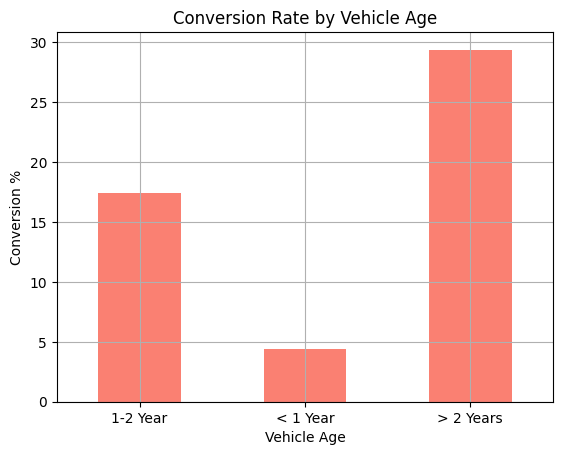

In [14]:
query = """
SELECT Vehicle_Age,
       ROUND(SUM(Response)*100.0 / COUNT(*), 2) AS conversion_rate
FROM vehicles
JOIN policies USING (id)
GROUP BY Vehicle_Age
"""
vehicle_conversion = pd.read_sql(query, conn)

vehicle_conversion.plot(kind='bar', x='Vehicle_Age', y='conversion_rate', legend=False, color='salmon')
plt.title("Conversion Rate by Vehicle Age")
plt.ylabel("Conversion %")
plt.xlabel("Vehicle Age")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


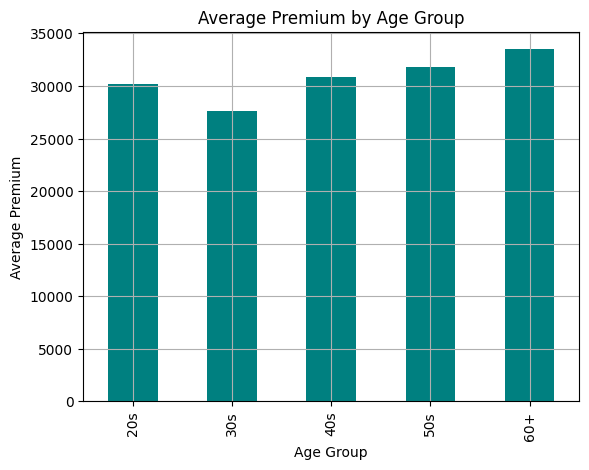

In [16]:
query = """
SELECT
  CASE
    WHEN Age BETWEEN 20 AND 29 THEN '20s'
    WHEN Age BETWEEN 30 AND 39 THEN '30s'
    WHEN Age BETWEEN 40 AND 49 THEN '40s'
    WHEN Age BETWEEN 50 AND 59 THEN '50s'
    ELSE '60+'
  END AS age_group,
  AVG(Annual_Premium) AS avg_premium
FROM customers
JOIN policies USING (id)
GROUP BY age_group
ORDER BY age_group
"""
age_premium = pd.read_sql(query, conn)

age_premium.plot(kind='bar', x='age_group', y='avg_premium', color='teal', legend=False)
plt.title("Average Premium by Age Group")
plt.ylabel("Average Premium")
plt.xlabel("Age Group")
plt.grid(True)
plt.show()


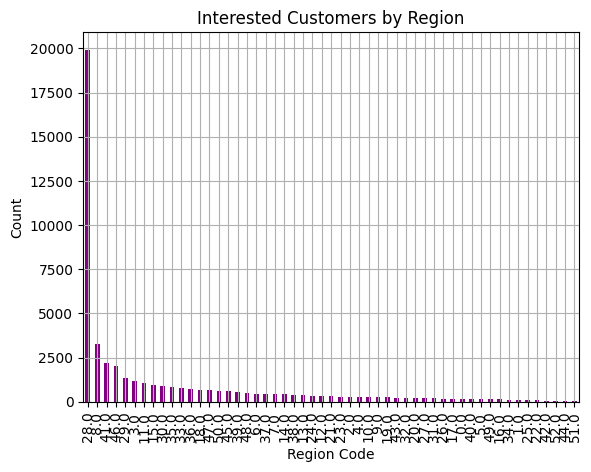

In [17]:
query = """
SELECT Region_Code, COUNT(*) AS interested_customers
FROM customers
JOIN policies USING (id)
WHERE Response = 1
GROUP BY Region_Code
ORDER BY interested_customers DESC
"""
region_interest = pd.read_sql(query, conn)

region_interest.plot(kind='bar', x='Region_Code', y='interested_customers', color='purple', legend=False)
plt.title("Interested Customers by Region")
plt.ylabel("Count")
plt.xlabel("Region Code")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


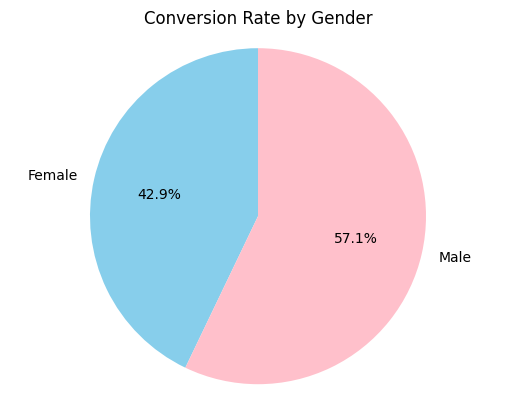

In [18]:
query = """
SELECT Gender,
       ROUND(SUM(Response)*100.0 / COUNT(*), 2) AS conversion_percent
FROM customers
JOIN policies USING (id)
GROUP BY Gender
"""
gender_conv = pd.read_sql(query, conn)

plt.pie(gender_conv['conversion_percent'], labels=gender_conv['Gender'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title("Conversion Rate by Gender")
plt.axis('equal')
plt.show()
